<a href="https://colab.research.google.com/github/IKurvers/introduction-to-github/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1
### Introduction to Machine Learning

This assignment is to be done with a partner. Please only submit ONE .ipynb (not .py) file per pair!

**Total points: 8**

**Write your names and student ids here before submission: Isabel Kurvers (9698434) and Rynke Bartholomeus (0974900)**

Lab1 is meant to help you get oriented to the programming part of the course, by implementing a simple perceptron.

## A brief introduction to Python

This is a Machine Learning course, and not a programming course. However, you need to program in order to run Machine Learning algorithms. In this course, we use Python, one of the most popular programming languages today. It was released for the first time in 1990, but gained extreme popularity in the last 15 years, hand in hand with the increasing importance of the world wide web, big data and data science. We use **Python 3** in the course to make full use of the features of the latest generation.

There is a lot of free literature about Python available that you can use for the course in addition to the lecture notes provided. Especially if you have difficulties understanding a particular concept, it is often a good idea to look at alternative explanations. Here are some links to useful Python online books:

* https://runestone.academy/ns/books/published/pythonds/index.html (“Problem Solving with Algorithms and Data Structures using Python”)
* https://python.swaroopch.com (“A Byte of Python”, especially for beginners)
* http://greenteapress.com/wp/think-python-2e/ (“Think Python”, also targeted at beginners)
* https://docs.python.org/3/tutorial/index.html (the official Python tutorial)

During the course we will work with the [Anaconda Python Data Science Platform](https://www.anaconda.com/); in particular we will use the Spyder Integrated Development Environment (IDE) and Jupyter notebooks. Below are instructions for installation and first steps with these environments.

## Python setup

In this course we use Python 3, and we do most of the programming in Jupyter notebooks (this lab is written in a Jupyter notebook).

**Easy installation** The easiest (and recommended) way to get the required software is to install Anaconda. Anaconda is a free and open source distribution of Python and some other programming languages used in scientific applications. It runs on all major operating systems and provides a number of very useful tools for Python programming.
Here is what you have to do to get started:

1. Go to https://docs.anaconda.com/anaconda/install/ and follow the installation instructions for your operating system. 

2. Go to https://docs.anaconda.com/anaconda/user-guide/getting-started/#open-nav-lin and follow the instructions how to start Spyder.

**Manual installation** You can also choose to install Python manually on your computer. How to do this depends on your operating system:

* Windows: https://www.python.org/downloads/windows/

* Mac OS X: install Python via [Fink](https://www.finkproject.org/) or [Homebrew](https://brew.sh/)

* Linux: install Python via [Apt](https://wiki.debian.org/Apt) or whichever package manager corresponds to your distribution

If you go for the manual option, make sure that you have numpy and matplotlib installed. You typically do this using [Pip](https://pypi.org/project/pip/). Note that most of the instructions written in the labs for this course assume you are using Anaconda.

**Last-resort option** If you have (unresolvable) trouble with the installation of Anaconda on your device, you can use it also via UU’s MyWorkplace (https://myworkplace.uu.nl/). The app that you need to start is called “Spyder Anaconda3”.

## Python versus C#

You probably have taken the course "Modelleren en programmeren", where you have learned C#. It might be useful to get a quick overview of how Python differs from C#. Let's look at a simple program in C#, which asks the user to enter their name and then prints out a message:

<img src="csharp.png" alt="drawing" width="600"/>

Note that we need about 10 lines of code to do this. Let's write the same program in Python:

In [ ]:
user_name = input()
print(f'Hello, {user_name}. How are you today?')

KeyboardInterrupt: ignored

Notice that we accomplished the same in 2 lines of code. That is one of the characteristics of Python: it is very compact. Furthermore, unlike in C#, we can write code without encapsulating it in a class. Finally, as we will see further, scope in Python is not determined by curly brackets, but rather by indentation. The C# code shown above contains three lines within the scope of the `Main` function, and they are all indented differently; this would cause errors in Python. Here is a function with correct indentation:

In [ ]:
def print_message(name):
    print(f'Hello, {name}. How are you today?')
    
user_name = input()
print_message(user_name)

KeyboardInterrupt: ignored

The `using` keyword from C# roughly equates to `import` in Python, which we will use in this course. Other differences between Python and C#:

* variable types do not have to be declared (see `user_name` above) in Python

* C# is developed by Microsoft, Python is open-source

* C# is compiled, Python is interpreted (you don't compile programs before running)

* Python has a huge set of pre-packaged libraries

Note that, as of recent Python versions, you are allowed to specified the expected types of the arguments of a function, as well as the return type. This is optional, but can sometimes make a function easier to read. For example:

In [ ]:
def concatenate_strings(word1: str, word2: str) -> str:
    return word1 + word2

# As opposed to:

def concatenate_strings(word1, word2):
    return word1 + word2

## Starting the notebook

Download the notebook from Blackboard. Use Anaconda Navigator to open Jupyter Notebooks, then open this notebook. Your web browser will open.

<img src="jupyter_home.png" alt="drawing" width="600"/>

Navigate to the location where you saved your notebook for this lab, and click on it. This notebook will open in the same browser.

## Perceptron

Consider the perceptron that you have seen in class, in two dimensions 

$h(x) = sign(w^Tx)$ 

where 

$w=[w_o, w_1, w_2]^T$ 

and 

$x = [1, x_1, x_2]^T$ 

(Technically, $x$ has three dimensions, but we call this a two-dimensional perceptron because the first dimension is fixed to 1).

In the following sections, you will complete a series of functions and code snippets to work with a perceptron and the perceptron learning algorithm. Fill in the parts labeled "FILL IN".

In Python, a `list` is a mutable collection of objects arranged in a sequence. A collection of datapoints can naturally be expressed as a list. A `tuple` is an immutable collection of objects arranged in a sequence; a tuple is an immutable list. The coordinates of a datapoint can naturally be expressed as a tuple.

**1a. Implement the *perceptron learning algorithm* (PLA)** (section 1.1.2 in the book) in Python (1 point)

**Answer.**

In [ ]:
def sign(val: float) -> int:
    if val > 0:
        return 1
    else:
        return -1
    
def initialize_weights(d: int) -> tuple:
    # This initializes a d-dimensional tuple with 0 in all the dimensions
    return tuple([0 for _ in range(d)])

import numpy as np
def perceptron(x: tuple, w: tuple) -> int:
    """
    x is a tuple of coordinates; the 0th element is 1. For example, x could be (1, -3.43, 0.75)
    w is a tuple of weights; the 0th element is the bias. For example, w could be (-0.83, 10.96, 1.06)
    
    The return value h should be a hypothesis (+1 or -1) for the datapoint x given the weights w
    """
    h = sign(np.dot(x,w))
    return h

def update_weights(x_t: tuple, y_t: int, w_t: tuple) -> tuple:
    """
    This is the update rule for the PLA; Eq. 1.3 in the book
    The return value w_t_plus_1 should be the updated weights (w0, w1, w2) at iteration step t+1
    """
    x_t = np.array(x_t)
    w_t = np.array(w_t)
    w_t_plus_1 = list(w_t+(y_t*x_t))
    return w_t_plus_1

def learn_weights(xn: list, yn: list) -> tuple:
    """
    This is the main body of the perceptron learning algorithm
    xn is a list of datapoints, each of which is a 3-dimensional tuple containing the coordinates for that point
    (remember the 0th coordinate is equal to 1)
    yn is a list of labels (+1 or -1) for the datapoints
    
    This function should call the functions above
    
    The number of iterations t required for convergence should be printed to the screen before exiting
    
    The return value w should be a tuple containing the learned weights (w0, w1, w2)
    """

    t = 1
    w = initialize_weights(3)
    y_list = []
    while(y_list != yn):
      y_list = []
      for j in range(len(xn)):
        y_list.append(perceptron(xn[j], w))
      for i in range(len(y_list)):
        if(y_list[i] != yn[i]):
          w = update_weights(xn[i], yn[i], w) 
          t+=1
          break
    print(f'Converged in {t} iterations')
    return w

If your code is correct, the following cell should raise no errors.

In [ ]:
def test_perceptron():
    assert 1 == perceptron([3, 4, 5], [0, 1, 2])
    print('perceptron works')
    
def test_update_weights():
    assert [-3, -3, -3] == update_weights([3, 4, 5], -1, [0, 1, 2])
    print('update_weights works')
    
test_perceptron()
test_update_weights()

perceptron works
update_weights works


**1b. Test your program on a toy dataset of 3 datapoints** (1 point)

Create these datapoints and run your program:

(1, 0.5, 1.5) -> +1

(1, 4.3, -0.3) -> -1

(1, -3.2, 2.2) -> +1

**Answer.**

In [ ]:
x3 = [(1, 0.5, 1.5),(1, 4.3, -0.3),(1, -3.2, 2.2)]
y3 = [1,-1, 1]
w = learn_weights(x3, y3)
print(w)

Converged in 3 iterations
[0.0, -3.8, 1.8]


If your code is correct, the following cell should raise no errors.

In [ ]:
def test_test_learn_weights():
    assert [0, -3.8, 1.8] == w
    print('Your test was correct')
    
test_test_learn_weights()

Your test was correct


**2. Generate a linearly separable dataset in two dimensions** (1 point)

Choose a random line in the plane as the target function, where one side of the line maps to +1 and the other maps to -1. Choose the inputs $x_n$ ($N=20$) to be random points in the plane, and evaluate the target function on each $x_n$ to get the corresponding output $y_n$.

**Answer.**

In [ ]:
import random

SLOPE, INTERCEPT = random.uniform(-10, 10), random.uniform(-10, 10)
MAX_VAL = 100

def get_random_point():
    x1 = random.uniform(-MAX_VAL, MAX_VAL)
    x2 = random.uniform(-MAX_VAL, MAX_VAL)
    return (1, x1, x2)

def target(x):
    """
    x is a datapoint; it is expressed as a tuple of the form (1, x1, x2)
    """
    if x[2] > SLOPE * x[1] + INTERCEPT:
        return 1
    else:
        return -1
    
def generate_data(n: int) -> tuple:
    """
    n is the number of datapoints you want to generate
    The return value should be a tuple with two elements (xn, yn), where xn and yn are both lists of length n
    """

    a = 0
    xn = []
    yn = []
    while(a<n):
      x = get_random_point()
      xn.append(x)
      y = target(x)
      yn.append(y)
      a = a+1

    return xn, yn

If your code is correct, the following cell should raise no errors.

In [ ]:
def test_generate_data():
    data = generate_data(3)
    assert 2 == len(data)
    assert 3 == len(data[0])
    print('generate_data works')

test_generate_data()

generate_data works


We now generate a dataset of 20 points:

In [ ]:
x20, y20 = generate_data(20)

**3. Plot the examples ${(x_n, y_n)}$ as well as the target function** 
(use `matplotlib`) (1 point)

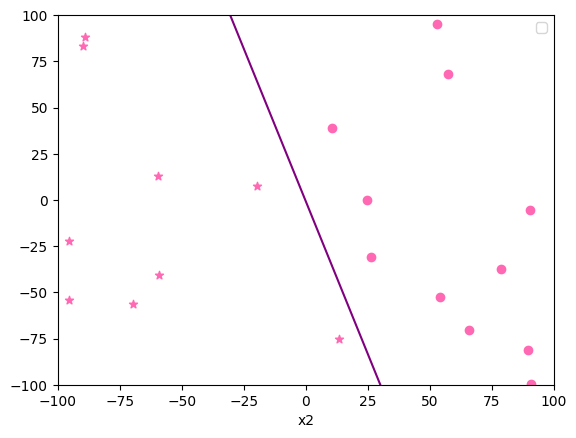

In [ ]:
import matplotlib.pyplot as plt

def get_plot_markers(yn: list) -> list:
    """
    Return a list of different markers for +1 and -1 samples
    The return value plot_marker should be a list of length n containing markers
    Each marker is a 1-character string
    There should be 1 marker for +1 and 1 marker for -1
    """ 
    plot_marker = []
    for y in yn:
      if y == +1:
        plot_marker.append("o")
      if y == -1:
        plot_marker.append("*")

    return plot_marker

def plot(xn, yn):
    # The x axis should be the x1 axis of the data
    # The y axis should be the x2 axis of the data
    # The marker should be different for +1 and -1 samples

    plot_x = [x[1] for x in xn]
    plot_y = [x[2] for x in xn]
    plot_marker = get_plot_markers(yn)

    # Plot the markers of the datapoints
    fig, ax = plt.subplots()
    for xp, yp, m in zip(plot_x, plot_y, plot_marker):
        ax.scatter([xp],[yp], marker=m, color='hotpink')

    # Add the random line used to generate the target function (HINT: use SLOPE and INTERCEPT)
    x_nieuw = np.linspace(-MAX_VAL, MAX_VAL, 100)
    plt.plot(x_nieuw, SLOPE* x_nieuw + INTERCEPT, linestyle='-', color='purple') 
    # Add axis labels and a legend
    plt.xlabel('x1')
    plt.xlabel('x2')
    plt.legend()
    plt.xlim(-MAX_VAL, MAX_VAL)
    plt.ylim(-MAX_VAL, MAX_VAL)
    plt.show()
    
plot(x20, y20)

If your code is correct, the following cell should raise no errors.

In [ ]:
def test_get_plot_markers():
    markers = get_plot_markers([-1, 1])
    assert 2 == len(markers)
    assert markers[0] != markers[1]
    print('get_plot_markers works')

test_get_plot_markers()

get_plot_markers works


Your plot should look approximately like this:

<img src="sample_plot.png" alt="drawing" width="300"/>

**4. Run the perceptron algorithm on the above dataset, and add the hypothesis 
to the plot.** (1 point)

*Note* the number of iterations. 

In [ ]:
w = learn_weights(x20, y20)

Converged in 5 iterations


**Answer.**

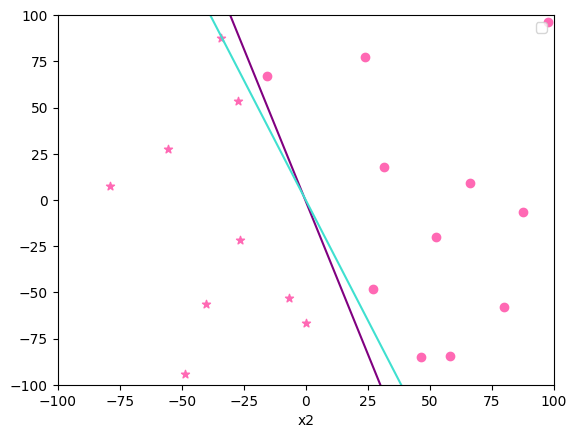

In [ ]:
def plot(xn, yn, w):
    # The x axis should be the x1 axis of the data
    # The y axis should be the x2 axis of the data
    # The marker should be different for +1 and -1 samples
    # w is the weights learned by the PLA

    plot_x = [x[1] for x in xn]
    plot_y = [x[2] for x in xn]
    plot_marker = get_plot_markers(yn)

    # Plot the markers of the datapoints
    fig, ax = plt.subplots()
    for xp, yp, m in zip(plot_x, plot_y, plot_marker):
        ax.scatter([xp],[yp], marker=m, color='hotpink')

    # Add the random line used to generate the target function (HINT: use SLOPE and INTERCEPT)
    x_nieuw = np.linspace(-MAX_VAL, MAX_VAL, 100)
    plt.plot(x_nieuw, SLOPE* x_nieuw + INTERCEPT, linestyle='-', color='purple') 
    
    # Add the learned hypothesis
    # To plot the hypothesis, we need to convert the weights w0, w1, w2 into a line
    # HINT: you are looking for the line w0 + w1x1 + w2x2 = 0    
    x1 = np.linspace(-MAX_VAL, MAX_VAL, 100)
    plt.plot(x1, (-w[0]-w[1]*x1)/w[2], linestyle='-', color='turquoise')


    # Add axis labels and a legend
    plt.xlabel('x1')
    plt.xlabel('x2')
    plt.legend()
    plt.xlim(-MAX_VAL, MAX_VAL)
    plt.ylim(-MAX_VAL, MAX_VAL)
    plt.show()
    
plot(x20, y20, w)

Your plot should look approximately like this:

<img src="sample_plot_hyp.png" alt="drawing" width="300"/>

**5. Generate another random dataset of 20 points, and repeat** (1 point)

Compare with the above results.

**Answer.**

Converged in 2 iterations


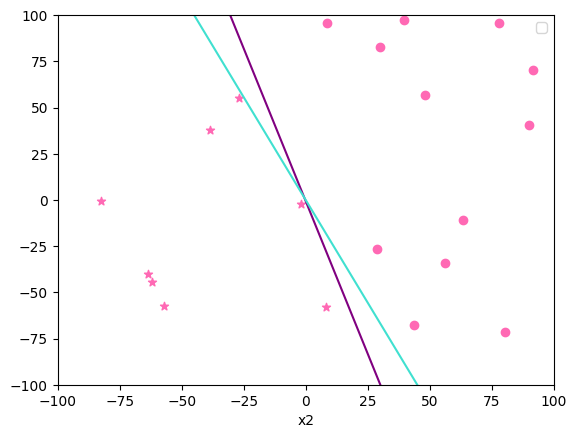

In [ ]:
x20, y20 = generate_data(20)
w = learn_weights(x20, y20)
plot(x20, y20, w)
# Use the same functions provided above

Your plot should look like the previous one, but not be exactly the same.

**6a. General a dataset of 1000 points and repeat.** (1 point)

Note how this compares with the above results.

**Answer.**

Converged in 2459 iterations


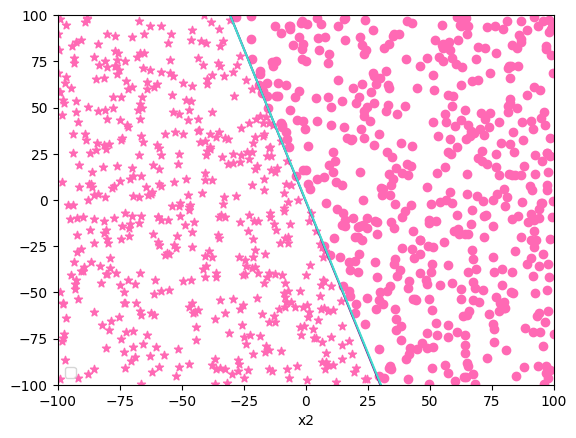

In [ ]:
x1000, y1000 = generate_data(1000)
w = learn_weights(x1000, y1000)
plot(x1000, y1000, w)
# Use the same functions provided above

Your plot should be similar to the previous one, but with many more points.

**6b. What can you say about what happens when you increase the number of datapoints?** (1 point)

**Answer.**

The hypothesis will approach the target line more accurately because there are more data points.